# SpaceX Data Analysis
###  Maximilian Wilhelm 02.12.2021

#### Project Summary
##### Goal of this Project is to analyse the Data taken from Kaggle about SpaceX Missions from 2012 - 2017. 

##### There are some main Questions concerning the Analisys:
-       The most launched vehicle type

-       Is there any correlation between data provided?

-       What is the future development of SpaceX?

-       What kind of rocket performance can be foreseen in the future?

-       What are the chances of success for future space missions?

##### And the following Tasks should be performed:
1.1.  Perform EDA for the provided data

a.       Perform EDA

b.       Compute the Pearson correlation coefficient. Which conclusion can you make? Compute other statistics. What they can show?

1.2.  Linear regression

a.                   Define linear function for your analysis. That is, f=ai+b, where a is the slope and b is the intercept. So find the best fit line using np.polyfit().

 

b.                   Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

1.3.  How is it optimal?

a.                   The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). Plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal? What does it mean for the research?

1.4.  Pairs bootstrap or permutation?

a.                   Perform pairs bootstrap or permutation to plot a histogram describing the estimate of the slope from the  data. Also report the 95% confidence interval of the slope.

1.5. Plotting bootstrap or permutation regressions

a.                   A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each replicate of the slope and intercept. Do this for the first 100 of your replicates of the slope and intercept

1.6.  Hypothesis test on Pearson correlation

a.                   Formulate Hypothesis and Test it. Provide a conclusion for it

1.7.  Provide the conclusion of your whole research. Is it possible to perfume here A/B Test? What it can show? What confidence intervals and p-values show us in regard to testing of Null-hypothesis?

1.8. What shows us a Bonferroni test? Use: https://www.investopedia.com/terms/b/bonferroni-test.asp

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data (perform EDA, provide error handlings, unit tests, data quality tests, etc)
* Step 3: Define the Data Model/ Null/Alternative Hypothesis
* Step 4: Show the Model of  Data and any conclutions
* Step 5: Complete Project Write Up

In [2305]:
# Do all imports and installs here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
import numpy as np
import sys
import scipy.stats as stats
import pylab as pl
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from statsmodels.sandbox.stats.multicomp import multipletests


### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

In [2306]:
# Read in the data here
# no decimals in csv
spacex = pd.read_csv('spacex.csv', sep=',')

In [2307]:
spacex.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.50000000,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.00000000,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

In [2308]:
# Performing cleaning tasks here
# First change Launch Date

spacex["Launch Date"] = pd.to_datetime(spacex["Launch Date"]).dt.strftime('%Y-%m-%d')

spacex.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,2006-03-24,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.50000000,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,2007-03-21,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.00000000,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


In [2309]:
# Informaton about columns
spacex.info()
sns.set_theme(style='darkgrid', palette='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight Number      41 non-null     object 
 1   Launch Date        41 non-null     object 
 2   Launch Time        41 non-null     object 
 3   Launch Site        41 non-null     object 
 4   Vehicle Type       41 non-null     object 
 5   Payload Name       41 non-null     object 
 6   Payload Type       38 non-null     object 
 7   Payload Mass (kg)  33 non-null     float64
 8   Payload Orbit      36 non-null     object 
 9   Customer Name      39 non-null     object 
 10  Customer Type      39 non-null     object 
 11  Customer Country   39 non-null     object 
 12  Mission Outcome    41 non-null     object 
 13  Failure Reason     8 non-null      object 
 14  Landing Type       28 non-null     object 
 15  Landing Outcome    21 non-null     object 
dtypes: float64(1), object(15)
me

**Finds:**
1. Payload and Customer Information are irrelevant for the Data Analysis
2. Every column except Payload Mass (kg) is an object type. Check for duplicates.
3. No Information about the duplicates can be stated yet. Permon countplots. 

In [2310]:
# Check for missing Data
nan_values = spacex.isna()
nan_columns = nan_values.any()
columns_with_nan = spacex.columns[nan_columns].tolist()
print('Missing Data in: ', columns_with_nan)

Missing Data in:  ['Payload Type', 'Payload Mass (kg)', 'Payload Orbit', 'Customer Name', 'Customer Type', 'Customer Country', 'Failure Reason', 'Landing Type', 'Landing Outcome']


**Finds:**
1. 9 Columns miss some values
2. Only 4 columns are relevant: Payload Mass, Failure Reason, Landing Type, Landing Outcome

**Output Columns in Question**

In [2311]:
# Show relevant Columns with NaN values
nan_spacex = spacex[['Payload Type', 'Payload Mass (kg)', 'Mission Outcome', 'Failure Reason', 'Landing Type', 'Landing Outcome']]
nan_spacex.head()

,Payload Type,Payload Mass (kg),Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,Research Satellite,19.50000000,Failure,Engine Fire During Launch,NaN,NaN
1,NaN,NaN,Failure,Engine Shutdown During Launch,NaN,NaN
2,Communication Satellite,NaN,Failure,Collision During Launch,NaN,NaN
3,Research Satellites,8.00000000,Failure,Collision During Launch,NaN,NaN
4,Human Remains,NaN,Failure,Collision During Launch,NaN,NaN


**Finds:**
1. Logically the Payload Mass should correlate with the Payload Type. If there is Payload it should have a weight.
2. Same with Mission Outcome and Failure Reason
3. Same with Landing Outcome and Landing type

In [2312]:
# Divide Data - Payload
nan_spacex_payload = nan_spacex[['Payload Type', 'Payload Mass (kg)']]

# Delete Rows with non NaN values
nan_spacex_payload = nan_spacex_payload[nan_spacex_payload.isna().any(axis=1)]

# Show NaN Values
nan_spacex_payload


,Payload Type,Payload Mass (kg)
1,NaN,NaN
2,Communication Satellite,NaN
4,Human Remains,NaN
5,NaN,165.00000000
7,NaN,NaN
8,Space Station Supplies,NaN
9,Space Station Supplies,NaN
17,Communication Satellite,NaN
28,Communication Satellite,NaN


In [2313]:
# Divide Data - Failure
nan_spacex_failure = nan_spacex[['Mission Outcome', 'Failure Reason']]

# Delete Rows with non NaN values
nan_spacex_failure = nan_spacex_failure[nan_spacex_failure.isna().any(axis=1)]

# Show NaN Values
nan_spacex_failure.head()

,Mission Outcome,Failure Reason
5,Success,NaN
6,Success,NaN
7,Success,NaN
8,Success,NaN
9,Success,NaN


In [2314]:
# Divide Data - Landing
nan_spacex_landing = nan_spacex[['Landing Type', 'Landing Outcome']]

# Delete Rows with non NaN values
nan_spacex_landing = nan_spacex_landing[nan_spacex_landing.isna().any(axis=1)]

# Show NaN Values
nan_spacex_landing.head()

,Landing Type,Landing Outcome
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


**Finds:**
1. Payload Type and Payload Mass does not correlate. Only the Payload Mass will be of use for this Analysis, so the mass off 165kg without Payload should be deleted
2. Mission Outcome and Failure Reason correlates. Data Quality is good.
3. Landing Type and Landing Outcome correlates. Data Quality is good.


In [2315]:
# Check if only one row has Payload Mass of 165kg
spacex = spacex[spacex['Payload Mass (kg)'] != 165.0].reset_index(drop=True)

# show Dataset
spacex.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,2006-03-24,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.50000000,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,2007-03-21,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.00000000,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


Check Object Data

<AxesSubplot:xlabel='Flight Number', ylabel='count'>

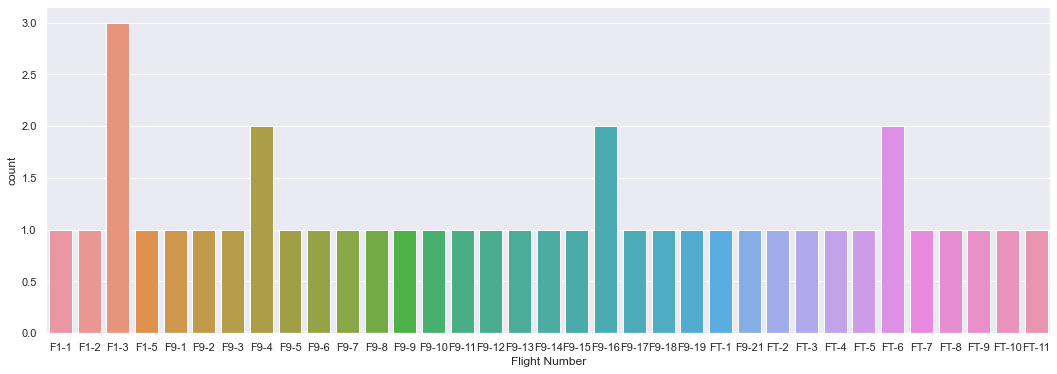

In [2316]:
# Prepare Plot
plt.figure(figsize=(18,6))

# Check columns for duplicates
sns.countplot(x='Flight Number', data=spacex)
# sns.countplot(x='Launch Date', data=spacex)
# sns.countplot(x='Launch Time', data=spacex)

In [2317]:
# There are 4 Flight Numbers with more than one row 
spacex_flight_number = spacex[spacex['Flight Number'] == 'F1-3'].append(spacex[spacex['Flight Number'] == 'F9-4']).append(spacex[spacex['Flight Number'] == 'F9-16']).append(spacex[spacex['Flight Number'] == 'FT-6']).reset_index(drop=True)
spacex_flight_number.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
1,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.00000000,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
2,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN
3,F9-4,2012-10-08,00:35,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS-1,Space Station Supplies,500.00000000,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN
4,F9-4,2012-10-08,00:35,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Orbcomm-OG2,Communication Satellite,150.00000000,Low Earth Orbit,Orbcomm,Business,United States,Failure,Engine Failure During Flight,NaN,NaN


**Finds:**
1. Rows with Flight Number F1-3 only differentiate in Payload and Customer. Customer Information is irrelevant only Payload Mass is important for the Analysis. Because it is different each time and 8kg is unrealistic, it will be set to NaN and the other rows will be deleted.
2. F9-4 seems like a 2 step mission. It is the only one of that kind. This irregularity will be deleted for Data Quality reasosns
3. Flight F9-16 has different Payloads and Customers but the Payload Mass is the same, so it was added togetehr. One row will be deleted.
4. The same applies to Flight Number FT-6

In [2318]:
# F1-3
spacex = spacex.drop(spacex[(spacex['Flight Number'] == 'F1-3') & spacex['Payload Mass (kg)'].isna()].index)
# Following outliers Detection

# F9-4
spacex = spacex.drop(spacex[spacex['Flight Number'] == 'F9-4'].index)

# F9-16
spacex = spacex.drop(spacex[(spacex['Flight Number'] == 'F9-16') & (spacex['Payload Name'] == 'ABS-3A')].index)

# FT-6
spacex = spacex.drop(spacex[(spacex['Flight Number'] == 'FT-6') & (spacex['Payload Name'] == 'ABS-2A')].index)

# Last step index reset
spacex = spacex.reset_index(drop=True)

spacex.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,2006-03-24,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.50000000,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,2007-03-21,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,2008-08-03,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.00000000,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-5,2009-07-14,03:35,Marshall Islands,Falcon 1,RazakSAT,Weather Satellite,180.00000000,Low Earth Orbit,ATSB,Government,Malaysia,Success,NaN,NaN,NaN
4,F9-1,2010-06-04,18:45,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Dragon Spacecraft Qualification Unit,NaN,NaN,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,Parachute,Failure


9600.0


C:\Users\MaksW\AppData\Local\Temp/ipykernel_9600/3332542334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_outliers['Launch Date'] = pd.to_datetime(spacex_outliers['Launch Date'])


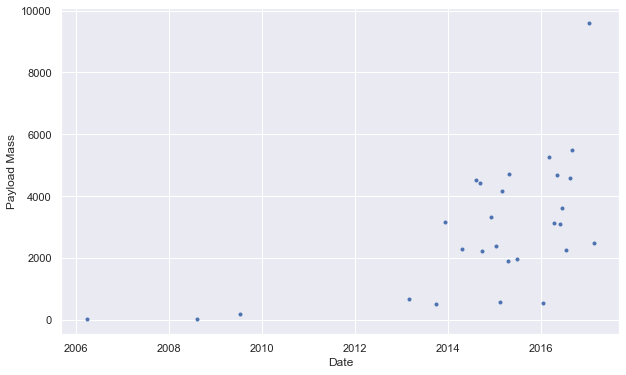

In [2319]:
# Outliers on Payload to Date
spacex_outliers = spacex[['Launch Date', 'Payload Mass (kg)']]

mass = spacex_outliers['Payload Mass (kg)']
outlier_max = mass.max()
print(outlier_max)
spacex_outliers['Launch Date'] = pd.to_datetime(spacex_outliers['Launch Date'])
date = spacex_outliers['Launch Date']

# Draw Plot. Cant get the xaxis to show intervals
plt.figure(figsize=(10,6))
_ = plt.plot(date, mass, '.')
_ = plt.xlabel('Date')
_ = plt.ylabel('Payload Mass')

In [2320]:
# Mean and Standard Deviation
mass = spacex_outliers['Payload Mass (kg)']
mean_mass = np.mean(mass)
sigma_std = np.std(mass)
print('Mean Mass: ', mean_mass)
print('Standard Deviation: ', sigma_std)

# calculate Z-scores to find outliers
z_scores = (mass - mean_mass)/sigma_std
Outliers_min = z_scores.min()
Outliers_max = z_scores.max()
print('Outliers_min',Outliers_min*sigma_std + mean_mass)
print('Outliers_max', Outliers_max*sigma_std + mean_mass)

Mean Mass:  2922.8035714285716
Standard Deviation:  2098.8142329968373
Outliers_min 8.0
Outliers_max 9600.0


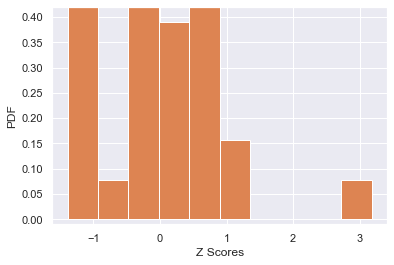

In [2321]:
# sorted
z_sorted = sorted(z_scores)
fit = stats.norm.pdf(z_sorted, np.mean(z_sorted), np.std(z_sorted))

# draw histogram of data
pl.plot(z_sorted,fit,'-o')
pl.hist(z_sorted,density=True)
              
# Make a legend, set limits and show plot
_ = plt.xlabel('Z Scores')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

In [2322]:
threshold = 3
outlier = []
for i in spacex_outliers['Payload Mass (kg)']:
    z = (i-mean_mass)/sigma_std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [9600.0]


In [2323]:
spacex_outliers = spacex_outliers.set_index('Launch Date')
spacex_outliers.head()

,Payload Mass (kg)
Launch Date,
2006-03-24,19.50000000
2007-03-21,NaN
2008-08-03,8.00000000
2009-07-14,180.00000000
2010-06-04,NaN


<AxesSubplot:xlabel='Launch Date'>

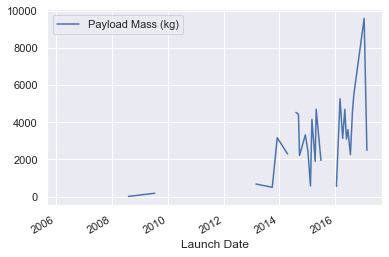

In [2324]:
spacex_outliers.plot()

<AxesSubplot:xlabel='Launch Date'>

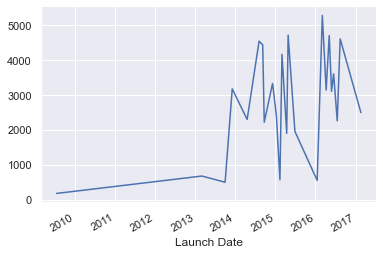

In [2325]:
y = spacex_outliers['Payload Mass (kg)']
spacex_removed = y.between(y.quantile(.05), y.quantile(.95))

y[spacex_removed].plot()

**Finds**
1. This Dataset is not normal distributed
2. Every statistic schows that the Payload Mass of 9600kg is an outlier. But that value is historical Data which can be verified.
3. The Payload of of 8kg cant be verified but the Flight can. So the Mass will be set to NaN

In [2326]:
# Set 8kg to NaN
spacex['Payload Mass (kg)'][spacex['Payload Mass (kg)'] == 8] = np.nan

C:\Users\MaksW\AppData\Local\Temp/ipykernel_9600/3798905205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex['Payload Mass (kg)'][spacex['Payload Mass (kg)'] == 8] = np.nan


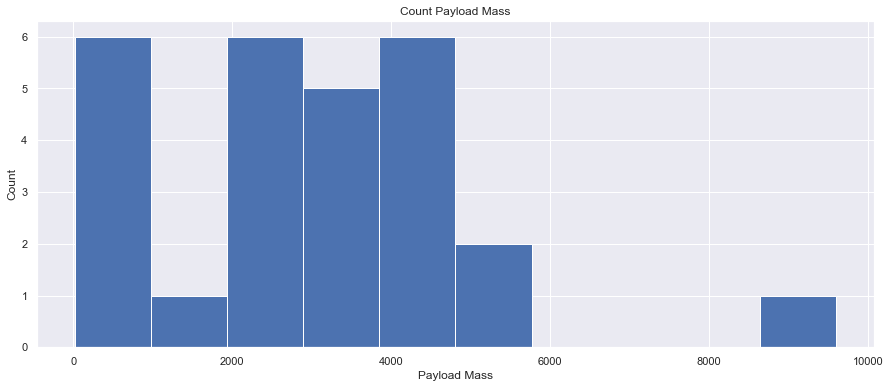

In [2327]:
# Create Plot
plt.figure(figsize=(15,6))
_ = plt.hist(spacex['Payload Mass (kg)'])
plt.title('Count Payload Mass')
plt.xlabel('Payload Mass')
plt.ylabel('Count')

# Shows Payload distribution of all time
plt.show()

In [2328]:
# Does the Payload Mass correlate with the Vehicle Type?
spacex_veh = spacex[['Launch Date','Vehicle Type', 'Payload Mass (kg)']]

# Delete rows with NaN Values
spacex_veh = spacex_veh.dropna().reset_index(drop=True)
spacex_veh.head()

,Launch Date,Vehicle Type,Payload Mass (kg)
0,2006-03-24,Falcon 1,19.50000000
1,2009-07-14,Falcon 1,180.00000000
2,2013-03-01,Falcon 9 (v1.0),677.00000000
3,2013-09-29,Falcon 9 (v1.1),500.00000000
4,2013-12-03,Falcon 9 (v1.1),3170.00000000


In [2329]:
spacex_veh_divided = pd.DataFrame({'Falcon 1': spacex_veh['Payload Mass (kg)'][spacex_veh['Vehicle Type'] == 'Falcon 1'],
 'Falcon 9 (v1.0)': spacex_veh['Payload Mass (kg)'][spacex_veh['Vehicle Type'] == 'Falcon 9 (v1.0)'],
 'Falcon 9 (v1.1)': spacex_veh['Payload Mass (kg)'][spacex_veh['Vehicle Type'] == 'Falcon 9 (v1.1)'],
 'Falcon 9 Full Thrust (v1.2)': spacex_veh['Payload Mass (kg)'][spacex_veh['Vehicle Type'] == 'Falcon 9 Full Thrust (v1.2)'],
 'Year': spacex_veh['Launch Date']})

spacex_veh_divided['Year'] = pd.to_datetime(spacex_veh_divided['Year'])

spacex_veh_divided.head()

,Falcon 1,Falcon 9 (v1.0),Falcon 9 (v1.1),Falcon 9 Full Thrust (v1.2),Year
0,19.50000000,NaN,NaN,NaN,2006-03-24
1,180.00000000,NaN,NaN,NaN,2009-07-14
2,NaN,677.00000000,NaN,NaN,2013-03-01
3,NaN,NaN,500.00000000,NaN,2013-09-29
4,NaN,NaN,3170.00000000,NaN,2013-12-03


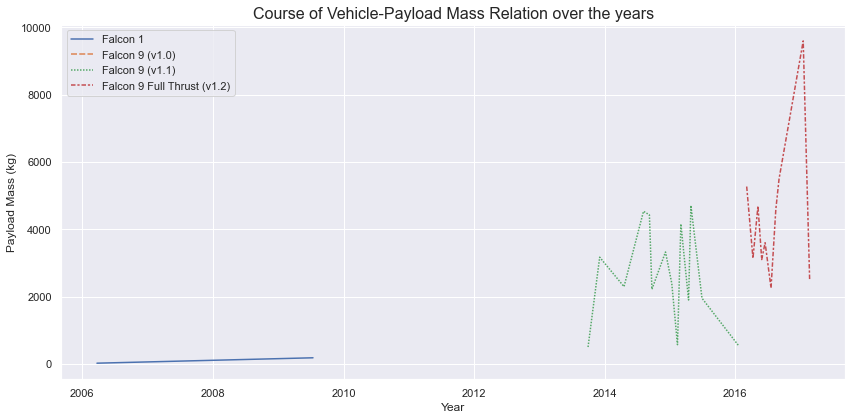

In [2330]:
# Set Index
spacex_veh_divided = spacex_veh_divided.set_index('Year')

# Plot Data
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=spacex_veh_divided)
ax.set_ylabel('Payload Mass (kg)')
ax.set_title('Course of Vehicle-Payload Mass Relation over the years', fontsize=16)

# Show Plot
plt.tight_layout()
plt.show()

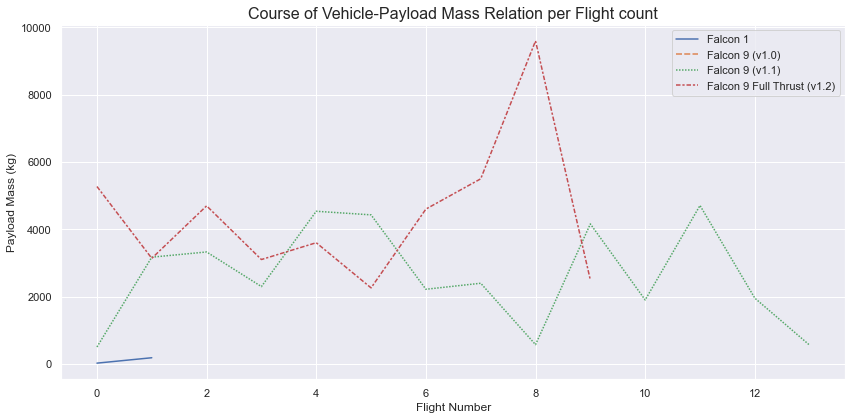

In [2331]:
# Same but different
spacex_veh_divided = spacex_veh_divided.apply(lambda x: pd.Series(x.dropna().values))

# Plot Data
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=spacex_veh_divided)
ax.set_ylabel('Payload Mass (kg)')
ax.set_xlabel('Flight Number')
ax.set_title('Course of Vehicle-Payload Mass Relation per Flight count', fontsize=16)

# Show Plot
plt.tight_layout()
plt.show()

**Finds:**
1. These graphs show the course over the years or multiple flights. Falcon 9 v1.0 only has one datapoint and is not visible because of that.
2. It is visible that the newer the Rocket the more Payload Mass it can handle

<AxesSubplot:xlabel='Launch Site', ylabel='count'>

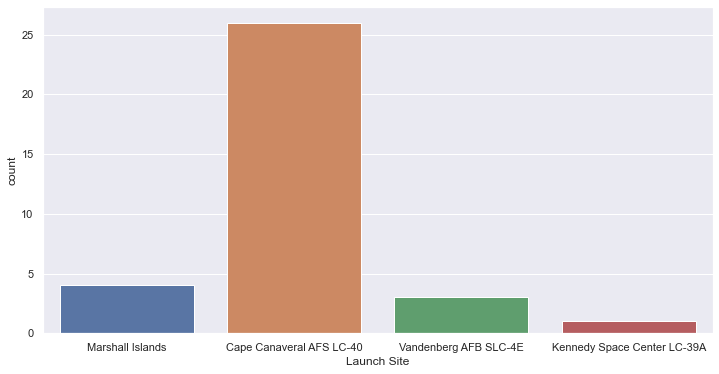

In [2332]:
# Prepare Plot
plt.figure(figsize=(12,6))

# Check columns for duplicates
sns.countplot(x='Launch Site', data=spacex)

<AxesSubplot:xlabel='Vehicle Type', ylabel='count'>

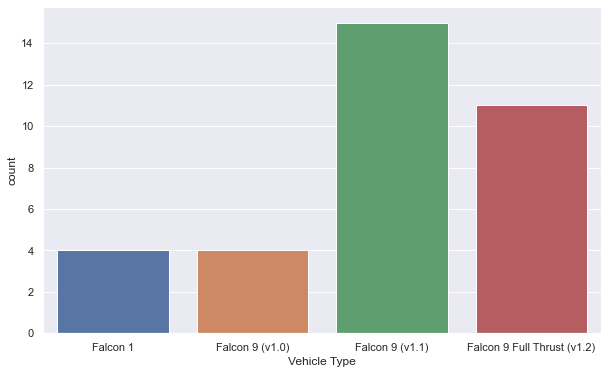

In [2333]:
# Cape Canaberal is the favored Launch Site

# Prepare Plot
plt.figure(figsize=(10,6))

# Check columns for duplicates
sns.countplot(x='Vehicle Type', data=spacex)

<AxesSubplot:xlabel='Mission Outcome', ylabel='count'>

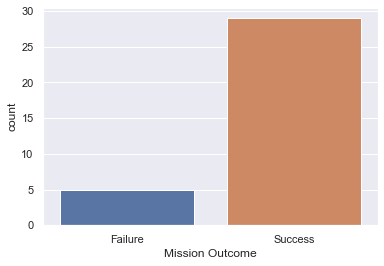

In [2334]:
# Check columns for duplicates
sns.countplot(x='Mission Outcome', data=spacex)

In [2335]:
spacex[(spacex['Vehicle Type'] == 'Falcon 9 (v1.0)')]

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
4,F9-1,2010-06-04,18:45,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Dragon Spacecraft Qualification Unit,NaN,NaN,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,Parachute,Failure
5,F9-2,2010-12-08,15:43,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C1),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,Parachute,Failure
6,F9-3,2012-05-22,07:44,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C2+),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN
7,F9-5,2013-03-01,15:10,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS-2,Space Station Supplies,677.00000000,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN


In [2336]:
# Does the Success Rate correlate with the number of Flight per Vehicle?
# Define Ararys with Counts of Flights and their Succes Count

# Count Number of Flight with each Vehicle
number_flights = [
    spacex['Vehicle Type'][spacex['Vehicle Type'] =='Falcon 1'].count(),
    spacex['Vehicle Type'][spacex['Vehicle Type'] =='Falcon 9 (v1.0)'].count(),
    spacex['Vehicle Type'][spacex['Vehicle Type'] =='Falcon 9 (v1.1)'].count(),
    spacex['Vehicle Type'][spacex['Vehicle Type'] =='Falcon 9 Full Thrust (v1.2)'].count()
]

# Count Number of Successes with each Vehicle
number_flights_success = [
    (spacex['Mission Outcome'][(spacex['Mission Outcome'] == 'Success') & (spacex['Vehicle Type'] == 'Falcon 1')]).count(),
    spacex['Mission Outcome'][(spacex['Mission Outcome'] == 'Success') & (spacex['Vehicle Type'] == 'Falcon 9 (v1.0)')].count(),
    spacex['Mission Outcome'][(spacex['Mission Outcome'] == 'Success') & (spacex['Vehicle Type'] == 'Falcon 9 (v1.1)')].count(),
    spacex['Mission Outcome'][(spacex['Mission Outcome'] == 'Success') & (spacex['Vehicle Type'] == 'Falcon 9 Full Thrust (v1.2)')].count()
]

# Task 1.1 Pearson Correlation
def pearson(x, y):
    # Compute correlation matrix: corr
    corr = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr[0,1]

# Check Pearson Correlation of Number of Flight and their Sucess Rate of each Vehicle Type
crr = pearson(number_flights, number_flights_success)
print('Pearson Correlation Coeficient between Flight Count and Success Count of each vehicle Type: ', crr)

Pearson Correlation Coeficient between Flight Count and Success Count of each vehicle Type:  0.9777451993442644


**Finds**
1. Pearson Correlation is strongly positive
2. For every Flight there is a ~94.06 percentage that it will succeed

<AxesSubplot:xlabel='Failure Reason', ylabel='count'>

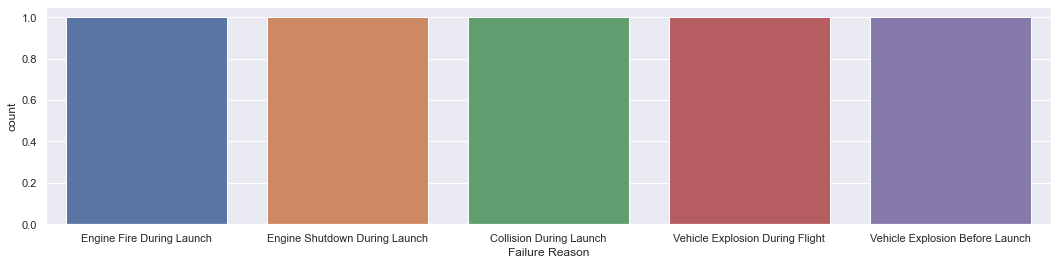

In [2337]:
# Prepare Plot
plt.figure(figsize=(18,4))

# Check columns for duplicates
sns.countplot(x='Failure Reason', data=spacex)

<AxesSubplot:xlabel='Landing Type', ylabel='count'>

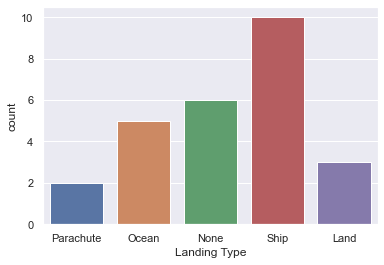

In [2338]:
# Check columns for duplicates
sns.countplot(x='Landing Type', data=spacex)

<AxesSubplot:xlabel='Landing Type', ylabel='Proportion'>

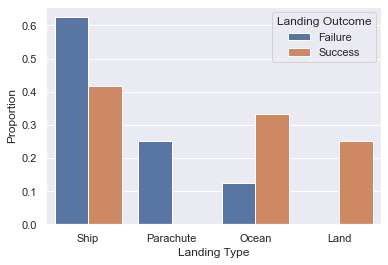

In [2339]:
# Does the Landing Type depend on its success?
# Set Parameters
x, y, hue = "Landing Type", "Proportion", "Landing Outcome"
hue_order = ["Success", "Failure"]

# Show barplot with proportion
(spacex[x]
 .groupby(spacex[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

**Finds:**
1. It is difficult to say if the Landing type depends on ots success.
2. In case of Ocean and land - yes, most definetly
3. The Parachute Landing did not fail once but was still only used twice even though the most used Ship Landing has a Success Rate of 6:4

<AxesSubplot:xlabel='Landing Outcome', ylabel='count'>

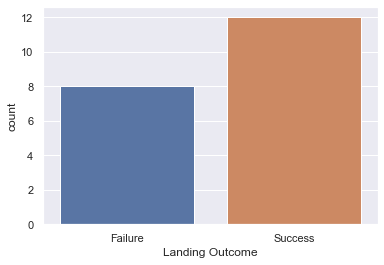

In [2340]:
# Check columns for duplicates
sns.countplot(x='Landing Outcome', data=spacex)

In [2341]:
# Toss out irrelevant Data
space = spacex.drop(['Payload Name', 'Customer Name', 'Payload Type','Customer Type', 'Payload Orbit'], axis=1)

# Convert DataType
space['Launch Date'] = pd.to_datetime(space['Launch Date'])

# Group Data by Topics
spacex_payload = space[pd.notna(spacex['Payload Mass (kg)'])]

# Show for Reference
spacex_payload.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Mass (kg),Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,2006-03-24,22:30,Marshall Islands,Falcon 1,19.50000000,United States,Failure,Engine Fire During Launch,NaN,NaN
3,F1-5,2009-07-14,03:35,Marshall Islands,Falcon 1,180.00000000,Malaysia,Success,NaN,NaN,NaN
7,F9-5,2013-03-01,15:10,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),677.00000000,United States,Success,NaN,NaN,NaN
8,F9-6,2013-09-29,16:00,Vandenberg AFB SLC-4E,Falcon 9 (v1.1),500.00000000,Canada,Success,NaN,Ocean,Failure
9,F9-7,2013-12-03,22:41,Cape Canaveral AFS LC-40,Falcon 9 (v1.1),3170.00000000,Luxembourg,Success,NaN,None,NaN


<AxesSubplot:title={'center':'Payload per Flight'}, xlabel='Launch Date', ylabel='payload Mass (kg)'>

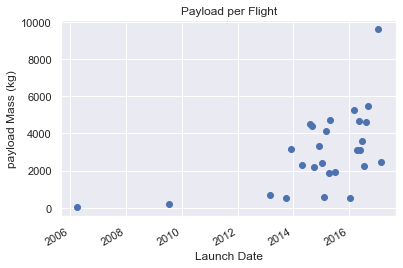

In [2342]:
# Task 1.2 Linear Regression
# Payload Mass/Date

# View Data
plt.title('Payload per Flight')
plt.ylabel('payload Mass (kg)')
space.set_index('Launch Date', inplace=True)
space['Payload Mass (kg)'].dropna().plot(marker='o', ls='')

In [2343]:
# Linear Regression
y = np.array(space['Payload Mass (kg)'].dropna().values, dtype=float)
x = np.array(pd.to_datetime(space['Payload Mass (kg)'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf) + intercept
print('r = ', r_value, 'p = ', p_value, 's = ', std_err)

# fit for rss
fit_payload_1 = np.polyfit(x,y,1)
mdf_payload_1 = np.poly1d(fit_payload_1)
print(mdf_payload_1)

r =  0.5487838664588905 p =  0.003034740210685169 s =  4.781769282143122e-15
 
1.57e-14 x - 1.922e+04


Unit of Linear Fit: payload Mass (kg)/Launch


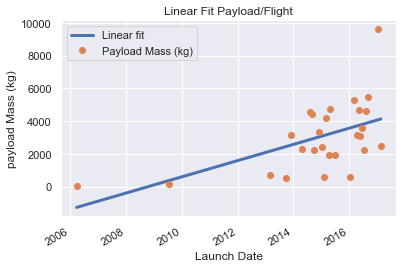

In [2344]:
# Data Visualisation
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
plt.title('Linear Fit Payload/Flight')
space['Payload Mass (kg)'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('payload Mass (kg)')
ax.legend()

# Unit
print('Unit of Linear Fit: payload Mass (kg)/Launch')

**Finds:**
1. Most of the Data is between 2012 and 2018.

<AxesSubplot:title={'center':'Payload per Flight'}, xlabel='Launch Date', ylabel='payload Mass (kg)'>

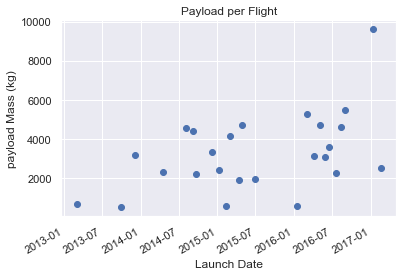

In [2345]:
# Delete Datapoints before 2012
space.drop(space.loc[space.index < '2012-01-01 01:00:00'].index, inplace=True)

# View Data
plt.title('Payload per Flight')
plt.ylabel('payload Mass (kg)')
space['Payload Mass (kg)'].dropna().plot(marker='o', ls='')

In [2346]:
# Linear Regression
y = np.array(space['Payload Mass (kg)'].dropna().values, dtype=float)
x = np.array(pd.to_datetime(space['Payload Mass (kg)'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf) + intercept
print('r = ', r_value, 'p = ', p_value, 's = ', std_err)

r =  0.47820270094398964 p =  0.015609399396737368 s =  1.0743281165213692e-14


Unit of Linear Fit: payload Mass (kg)/Launch
 
2.805e-14 x - 3.7e+04


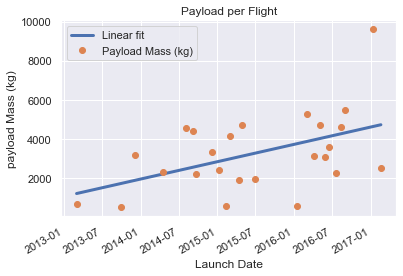

In [2347]:
# Data Visualisation
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
plt.title('Payload per Flight')
plt.ylabel('payload Mass (kg)')
space['Payload Mass (kg)'].dropna().plot(ax=ax,marker='o', ls='')
ax.legend()

# Unit
print('Unit of Linear Fit: payload Mass (kg)/Launch')

# fit for rss
fit_payload_2 = np.polyfit(x,y,1)
mdf_payload_2 = np.poly1d(fit_payload_2)
print(mdf_payload_2)

**Finds:**
1. Deleting the rare Datapoints does not make a huge Difference
2. By Year 2018 the Linear Regression shows a 500-1000kg Difference


Text(0, 0.5, 'Count Successful Flights')

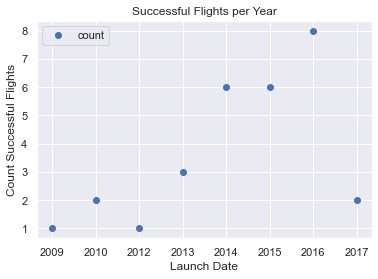

In [2348]:
# Task 1.2 Linear Regression
# Payload Successful Missions/Year

# Prepare Data
spacex_success = spacex.copy()
spacex_success['Launch Date'] = pd.to_datetime(spacex_success['Launch Date']).dt.strftime('%Y')

# Toss out Data
spacex_success = spacex_success[['Launch Date', 'Mission Outcome']]

# Count successful Flights per year
spacex_success = spacex_success[spacex_success['Mission Outcome'] == 'Success'].groupby([spacex_success['Launch Date']]).agg({'count'})

# View Data
spacex_success.drop(spacex_success.columns[0], axis=1, inplace=True)
spacex_success['Mission Outcome'].dropna().plot(marker='o', ls='')
plt.title('Successful Flights per Year')
plt.ylabel('Count Successful Flights')


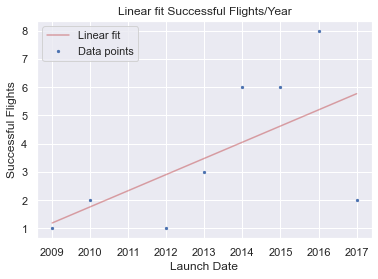

Unit of Linear Fit: Successful Flights/Year
 
0.5721 x - 1148


In [2349]:
# Linear Regression
y = spacex_success['Mission Outcome']
x = spacex_success.index.astype(int)
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  

# Plotting Data
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points')
ax.set_title('Linear fit Successful Flights/Year')
plt.ylabel('Successful Flights')
plt.xlabel('Launch Date')
ax.legend()

# Show Plot
plt.show()

# Unit
print('Unit of Linear Fit: Successful Flights/Year')

# fit for rss
fit_success = np.polyfit(x,y,1)
fit_success = np.squeeze(fit_success)
mdf_success = np.poly1d(fit_success)
print(mdf_success)

**Finds:**
1. This statistic is most likely not accurate because of the small number of Datapoints.
2. It shows that every 3 years SpaceX has approximately 2 additional successful Flights

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chosen that model

#### 3.2 Hypothesis Tests
provide needed statistiks with explonation and answer to your business questions for the analysis

In [2350]:
# Code Block 
def minimum(f, start):
    optimationResult = optimize.minimize(f, x0=start, method='Powell')
    return optimationResult.x[0]

def both_minima(f, start):
    min_left = minimum(f, start - 1)
    min_right = minimum(f, start + 1)
    return (min_left, min_right)

# https://www.youtube.com/watch?v=zNkRx9pMF_0
def rss(x, y, slope, intercept):
    return np.sum((y - (intercept + slope * x))**2)

def rss_parabel(i):
    # Move to zero on axis
    return abs(rss(x, y, i, intercept) - slop * 1.1)


spacex_custom_success = {'Year': [2009,2010,2012,2013,2014,2015,2016,2017],
                         'Count': [1,2,1,3,6,6,8,2]}
spacex_custom_success = pd.DataFrame(data=spacex_custom_success)


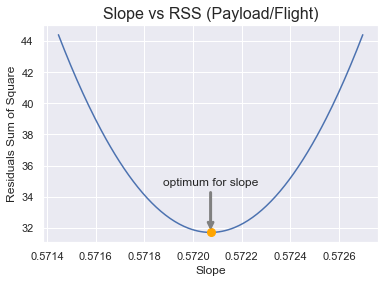

In [2351]:
# Task 1.3

# Does not work with np.polyfill
y = spacex_custom_success['Count']
x = spacex_custom_success['Year']
poly = np.polynomial.Polynomial.fit(x, y, 1).convert().coef
intercept = poly[0]
slope = poly[1]

slop = rss(x, y, slope, intercept)

# Right and Left Minimum an their distance
min_left, min_right = both_minima(rss_parabel, slope)
delta = abs(min_left - min_right)

# Slope Values
slope_start = slope - delta
slope_end = slope + delta
slope_values = np.linspace(slope_start, slope_end, 200)

# RSS Values
rss_values = np.empty_like(slope_values)
for i, slope_at_i in enumerate(slope_values):
    rss_values[i] = rss(x, y, slope_at_i, intercept)

# Plot RSS and Polyfit
plt.plot(slope_values, rss_values)
plt.plot(slope, slop, marker='o', markersize=8, color="orange")
plt.annotate('optimum for slope',
             xy=(slope, slop),
             xytext=(slope, rss(x, y, slope + delta / 2, intercept)),
             arrowprops={'arrowstyle': '->', 'color': 'grey', 'lw': 3, 'ls': '-'},
             va='center',
             ha='center'
             )
plt.xlabel('Slope')
plt.ylabel('Residuals Sum of Square')
plt.title('Slope vs RSS (Payload/Flight)', fontsize=16)
plt.show()

In [2352]:
# Code Block
def pairBootstrap(x, y, size=1, percentage=1):
    # Set up array of indices to sample from: inds
    index = np.arange(len(x))
    # Initialize replicates: slopes, intercepts
    slopes = np.empty(size)
    intercepts = np.empty(size)
    # Generate replicates
    for i in range(size):
        indices = np.random.choice(index, size=round(len(index) * percentage))
        slopes[i], intercepts[i] = np.polyfit(x[indices], y[indices], 1)
    return slopes, intercepts

def confidenceInterval(array, confidenceLevel=1):
    # Alpha Value
    a = 1 - confidenceLevel
    a_half = a / 2
    # Confidence Interval
    return np.percentile(array, [a_half * 100, (1 - a_half) * 100])

95 percent Confidence Interval:  [0.00566265 1.33639446]


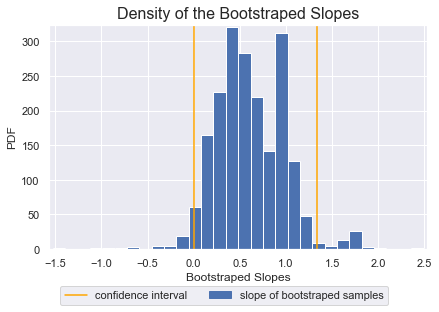

In [2353]:
# Generate array of x-values for bootstrap lines
bootstrapSize = 2000
xValues = np.array([0, bootstrapSize])

# Generate the Bootstrap Samples
bootstrapSlopes, bootstrapIntercepts = pairBootstrap(x, y, bootstrapSize, 0.95)

# 95 Confidence Interval of the bootstraped Slopes (Successful Flights/Year):
interval = confidenceInterval(bootstrapSlopes, 0.95)
print('95 percent Confidence Interval: ', interval)

plt.hist(bootstrapSlopes, bins=30)
plt.axvline(interval[0], color='orange')
plt.axvline(interval[1], color='orange')

interval_marker = [
    Line2D([0], [0], label='confidence interval', color='orange'),
    mpatches.Patch(color='C0', label='slope of bootstraped samples')
]

plt.gcf().legend(handles=interval_marker, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(interval_marker))
plt.title('Density of the Bootstraped Slopes', fontsize=16)
plt.tight_layout()
plt.ticklabel_format(useOffset=False, style='plain')
plt.margins(0.01)
plt.xlabel('Bootstraped Slopes')
plt.ylabel('PDF')
plt.show()

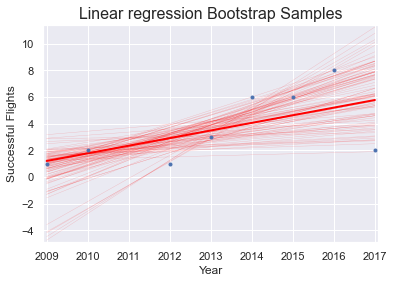

In [2354]:
# Task 1.5
# Plot 100 Bootstrap Lines
for i in range(100):
    plt.plot(x, bootstrapSlopes[i] * x + bootstrapIntercepts[i], linewidth=0.4, alpha=0.2, color='red')

# Plot Data and Linear Regression
plt.plot(x, slope * x + intercept, linewidth=2, alpha=1, color='red')
plt.plot(x, y, marker='.', linestyle='none')

# Plot Data
plt.xlabel('Year')
plt.ylabel('Successful Flights')
plt.margins(0.01)
plt.title('Linear regression Bootstrap Samples', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

**Finds:**
1. There is too less Data to make them the abse of bootstrap
2. Ignore everything which starts below (2009|0) because there cannot be negative successful Flight.

Pearson Correlation Coeficient between Flight Count and Success Count of each vehicle Type:  0.9777451993442644
It is strongly positive and nearly equals 1. The Hypothesis is correct.


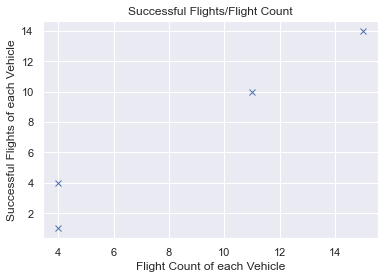

In [2355]:
# Task 1.6
# Hypothesis: The Success Rate of each SpaceX Rocket increases with the Number of Flights it takes

# pearson Method
def pearson(x, y):
    # Compute correlation matrix: corr
    corr = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr[0,1]

# Check Pearson Correlation of Number of Flight and their Sucess Rate of each Vehicle Type
crr_success = pearson(number_flights, number_flights_success)
print('Pearson Correlation Coeficient between Flight Count and Success Count of each vehicle Type: ', crr_success)
print('It is strongly positive and nearly equals 1. The Hypothesis is correct.')

# Plot Data
# Each X represents one Vehicle
plt.plot(number_flights,number_flights_success, 'x')
plt.title('Successful Flights/Flight Count')
plt.xlabel('Flight Count of each Vehicle')
plt.ylabel('Successful Flights of each Vehicle')
plt.show()

Pearson Correlation Coeficient Payload Mass Mean over the Years:  0.8908783671587771
It is strongly positive and nearly equals 1. The Hypothesis is correct.


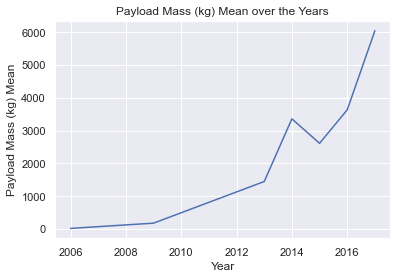

In [2356]:
# Task 1.6
# Hypothesis: The Payload Mass Mean increases over the Years

# Prepare Data
spacex_payload_cutted = spacex_payload[['Launch Date', 'Payload Mass (kg)']].copy()
spacex_payload_cutted["Launch Date"] = pd.to_datetime(spacex_payload_cutted["Launch Date"]).dt.strftime('%Y')
spacex_payload_cutted.set_index('Launch Date')
spacex_payload_cutted = spacex_payload_cutted.groupby(['Launch Date']).mean()

# Check Pearson Correlation of Payload Mass Mean over the Years
crr_payload = pearson(spacex_payload_cutted.index.astype(float), spacex_payload_cutted["Payload Mass (kg)"])
print('Pearson Correlation Coeficient Payload Mass Mean over the Years: ', crr_payload)
print('It is strongly positive and nearly equals 1. The Hypothesis is correct.')

# Plot Data
plt.plot(spacex_payload_cutted.index.astype(float),spacex_payload_cutted["Payload Mass (kg)"])
plt.title('Payload Mass (kg) Mean over the Years')
plt.xlabel('Year')
plt.ylabel('Payload Mass (kg) Mean')
plt.show()

**Finds:**
1. The Payload Mass (kg) Mean over the Years likely has an exponential increase

In [2357]:
# Task 1.7
# Conclusion will be provided in Step 4
# https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/
# "A/B testing is a basic randomized control experiment.
# It is a way to compare the two versions of a variable to find out which performs better in a controlled environment."
# Based on the Data provided by the Dataset a randomized experiment does not make sense because the SpaceX Flight depend on each Rocket which Data is not provided.
# Even the Outliers Test wanted to throw out the Data with Payload Mass 9600kg even though it is legit Data


In [2358]:
# Task 1.8
# https://www.investopedia.com/terms/b/bonferroni-test.asp
# The Bonferroni test is a type of multiple comparison test used in statistical analysis. When performing a hypothesis test with multiple comparisons, eventually a result could occur that appears to demonstrate statistical significance in the dependent variable, even when there is none.
# If a particular test, such as a linear regression, thus yields correct results 99% of the time, running the same regression on 100 different samples could lead to at least one false-positive result at some point. The Bonferroni test attempts to prevent data from incorrectly appearing to be statistically significant like this by making an adjustment during comparison testing.

# Hypothesis 1: The Success Rate of each SpaceX Rocket increases with the Number of Flights it takes
RangeTest=10000
perm_replicates = np.empty(RangeTest)

year=spacex_payload_cutted.index.astype(float)
payload=spacex_payload_cutted["Payload Mass (kg)"]

# Pearson Correlation Coefficient
r = pearson(year, payload)
print('Hypothesis 1:\nPearson Correlation')
print(r)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(RangeTest)
# Draw replicates
for i in range(RangeTest):
    year_permuted = np.random.permutation(year)
    perm_replicates[i] = pearson(year_permuted, payload)

# P-Value
p = np.sum(perm_replicates >= r) / len(perm_replicates)
print('p-value =', p)

#Bonferoni Test_
p_adjusted = multipletests(p, method='bonferroni')
print('Bonferroni', p_adjusted)
print('Even though the PCC is positive Hypothesis 1 is wrong because the P-Value is less than 0.05 and the Bonferroni Correction is True')
print('\n')

##############################################################

# Hypothesis 2: The Payload Mass Mean increases over the Years
RangeTest=10000
perm_replicates = np.empty(RangeTest)

# Pearson Correlation Coefficient
r = pearson(number_flights, number_flights_success)
print('Hypothesis 2:\nPearson Correlation')
print(r)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(RangeTest)
# Draw replicates
for i in range(RangeTest):
    number_flights_permuted = np.random.permutation(number_flights)
    perm_replicates[i] = pearson(number_flights_permuted, number_flights_success)

# P-Value
p = np.sum(perm_replicates >= r) / len(perm_replicates)
print('p-value =', p)

#Bonferoni Test_
p_adjusted = multipletests(p, method='bonferroni')
print('Bonferroni', p_adjusted)
print('Even though the PCC is positive Hypothesis 2 is wrong because the P-Value is less than 0.05 and the Bonferroni Correction is True')


Hypothesis 1:
Pearson Correlation
0.8908783671587771
p-value = 0.0009
Bonferroni (array([ True]), array([0.0009]), 0.050000000000000044, 0.05)
Even though the PCC is positive Hypothesis 1 is wrong because the P-Value is less than 0.05 and the Bonferroni Correction is True


Hypothesis 2:
Pearson Correlation
0.9777451993442644
p-value = 0.0829
Bonferroni (array([False]), array([0.0829]), 0.050000000000000044, 0.05)
Even though the PCC is positive Hypothesis 2 is wrong because the P-Value is less than 0.05 and the Bonferroni Correction is True


### Step 4: Show your solution: the Model of  Data and any conclutions 
#### 4.1 Create graphics, any needed queris to visualise your solution


<AxesSubplot:xlabel='Vehicle Type', ylabel='count'>

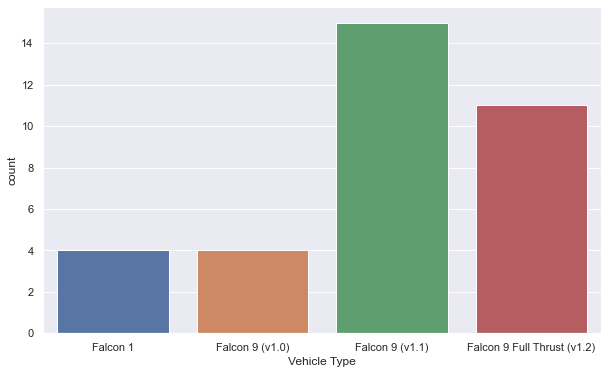

In [2359]:
# The most launched vehicle type
# Prepare Plot
plt.figure(figsize=(10,6))

# Check columns for duplicates
sns.countplot(x='Vehicle Type', data=spacex)


In [2360]:
# Falcon 9 (v1.1) ist the most used Vehicle Type until 2017

# Is there any correlation between data provided?
# Was already shown before

# What is the future development of SpaceX?
# Payload Mass
spacex_payload_future = spacex[['Launch Date', 'Payload Mass (kg)']]
spacex_payload_future = spacex_payload_future.dropna()
spacex_payload_future = spacex_payload_future.set_index('Launch Date')
spacex_payload_future.index = pd.to_datetime(spacex_payload_future.index)
spacex_payload_future = spacex_payload_future.sort_index()
spacex_payload_future = spacex_payload_future[spacex_payload_future.index > '2012-01-01']
spacex_payload_cutted.index = pd.to_datetime(spacex_payload_cutted.index)

Text(0.5, 1.0, 'Payload Mass (kg) and Mean Resample')

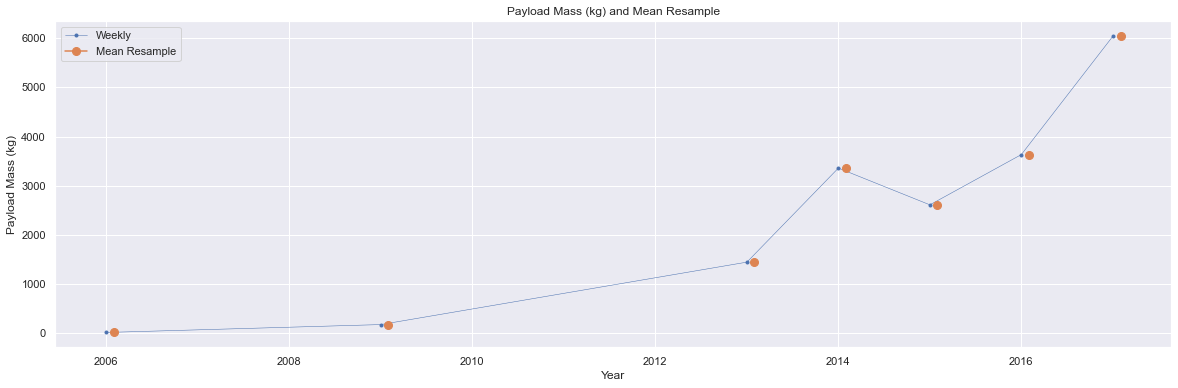

In [2361]:
y = spacex_payload_cutted['Payload Mass (kg)']
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_ylabel('Payload Mass (kg)')
ax.set_xlabel('Year')
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Mean Resample')
ax.legend()
ax.set_title('Payload Mass (kg) and Mean Resample')

In [2362]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
ADF_test(y,'Payload Mass')

 > Is the Payload Mass stationary ?
Test statistic = 0.137
P-value = 0.968
Critical values :
	1%: -5.354256481481482 - The data is not stationary with 99% confidence
	5%: -3.6462381481481483 - The data is not stationary with 95% confidence
	10%: -2.901197777777778 - The data is not stationary with 90% confidence


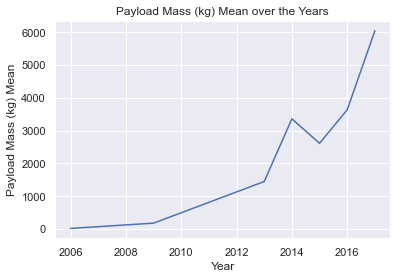

In [2363]:
# Plot Data
plt.plot(spacex_payload_cutted.index,spacex_payload_cutted["Payload Mass (kg)"])
plt.title('Payload Mass (kg) Mean over the Years')
plt.xlabel('Year')
plt.ylabel('Payload Mass (kg) Mean')
plt.show()

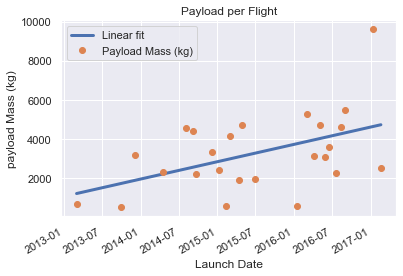

In [2364]:
# Linear Regression
y = np.array(space['Payload Mass (kg)'].dropna().values, dtype=float)
x = np.array(pd.to_datetime(space['Payload Mass (kg)'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf) + intercept

# Data Visualisation
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
plt.title('Payload per Flight')
plt.ylabel('payload Mass (kg)')
space['Payload Mass (kg)'].dropna().plot(ax=ax,marker='o', ls='')
ax.legend()

**Finds:**
1. Every Statistic shows that SpaceX will be able to handle more Payload Mass per Flight.
2. Linear Regression of every Flight shows a positive but not a huge increase
3. The Graph of Payload Mean over the Years even shows a nearly exponential increase of the payload Mass in the future.

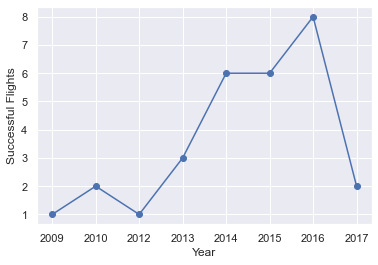

In [2365]:
# What is the future development of SpaceX?

# Successful Flights per Year
_ = plt.xlabel('Year')
_ = plt.ylabel('Successful Flights')
_ = plt.plot_date(spacex_success.index, spacex_success['Mission Outcome'], '-o')
plt.show()

In [2366]:
spacex_success['Mission Outcome']['count']

Launch Date
2009    1
2010    2
2012    1
2013    3
2014    6
2015    6
2016    8
2017    2
Name: count, dtype: int64

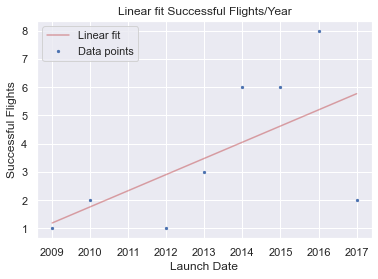

In [2367]:
# Successful Flight per Year
# Linear Regression
y = spacex_custom_success['Count']
x = spacex_custom_success['Year']
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  

# Plotting Data
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points')
ax.set_title('Linear fit Successful Flights/Year')
plt.ylabel('Successful Flights')
plt.xlabel('Launch Date')
ax.legend()

# Show Plot
plt.show()

In [2368]:
# What are the chances of success for future space missions?
# Overall Success rate of SpaceX Missions is:  ~85.29%
# Compare Successful Flight to sum of all Flights
spacex_count = spacex[['Launch Date', 'Mission Outcome']].copy()
spacex_count["Launch Date"] = pd.to_datetime(spacex_count["Launch Date"]).dt.strftime('%Y')
# Count all Flights per year
spacex_count = spacex_count.groupby([spacex_count['Launch Date']]).agg({'count'})

# 1D Array
count_all = {'Year': [2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017],
             'All':         [1,1,1,1,2,1,3,6,7,9,2],
             'Success':     [0,0,0,1,2,1,3,6,6,8,2]}
count_all = pd.DataFrame(data=count_all)
count_all = count_all.set_index('Year')

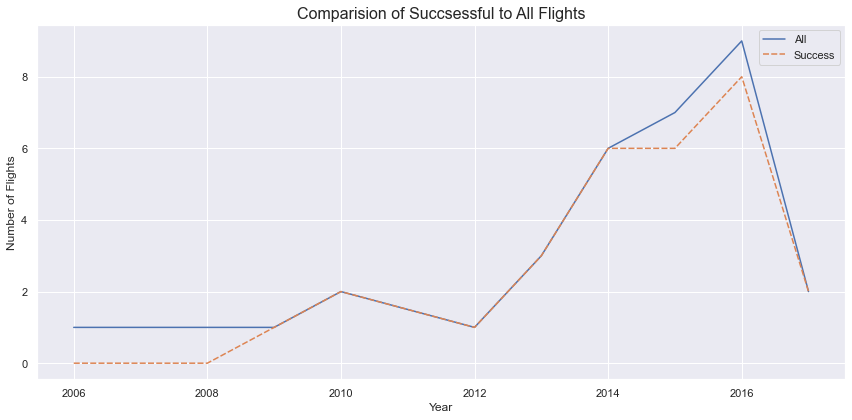

In [2369]:
# Plot Data
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=count_all)
ax.set_ylabel('Number of Flights')
ax.set_xlabel('Year')
ax.set_title('Comparision of Succsessful to All Flights', fontsize=16)

# Show Plot
plt.tight_layout()
plt.show()

In [2370]:
all_missions = spacex['Mission Outcome'][spacex['Mission Outcome'].notna()].count()
success_missions = spacex['Mission Outcome'][(spacex['Mission Outcome'].notna()) & (spacex['Mission Outcome'] == 'Success')].count()

overall = success_missions/all_missions

print('Overall Success rate of SpaceX Missions is: ', overall)

Overall Success rate of SpaceX Missions is:  0.8529411764705882


**Finds:**
1. The Linear Regression predicts that there will be ~2 more Successful Flights per 3 years
2. The Comparision of Successful to All Flights shows that SpaceX already had a high percentage of Success. But how high?

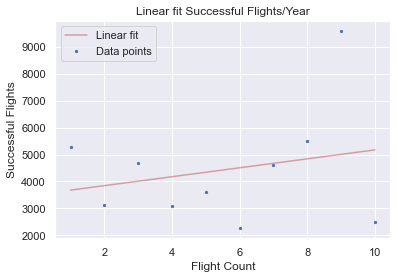

In [2371]:
# What kind of rocket performance can be foreseen in the future?
# The sorted Data shows that only Falcon 9 Full Thrust (v1.2) is in use
# So there is no point in analyzing the other 3 Rockets

# Prepare Data
spacex_falcon = spacex[spacex['Vehicle Type'] == 'Falcon 9 Full Thrust (v1.2)']
spacex_falcon = spacex_falcon[['Launch Date', 'Vehicle Type', 'Payload Mass (kg)', 'Mission Outcome']].dropna()

spacex_falcon_idk = spacex_falcon[['Payload Mass (kg)']]
spacex_falcon_idk = spacex_falcon_idk.reset_index()

# Successful Flight per Year
# Linear Regression
y = spacex_falcon_idk['Payload Mass (kg)']
x = (spacex_falcon_idk.index + 1)
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  

# Plotting Data
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points')
ax.set_title('Linear fit Successful Flights/Year')
plt.ylabel('Successful Flights')
plt.xlabel('Flight Count')
ax.legend()

# Show Plot
plt.show()

**Finds:**
1. The Falcon 9 Full Thrust (v1.2) shows a minimal increase in Payload Mass and in the number of overall Flight over the Years.

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the dataframes. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [2372]:
# Data Quality Checks were already done at the beginning to ensure correct Analysis

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

**Data Dictionary**

*Dataset Source:* https://www.kaggle.com/spacex/spacex-missions
The data was scraped from the SpaceX and NASA website.

The Dataset did not include the latest data. It only includes Data until 2017.

**Information about the data**
- Flight Number: ID for every Flight
- Launch Date: Date of the Launch
- Launch Time: Time of the Launch (irrelevant)
- Launch Site: Location the Launch took place
- Vehicle Type: The Rocket which was used
- Payload Name: Specifies the given Payload Name of Flight (irrelevant)
- Payload Type: Specifies the Payload Content of the Flight (irrelevant)
- Payload Mass (kg): Weight of the Payload of the Flight
- Payload Orbit: Orbit Goal of the Payload
- Customer Name: Name of the Customer/Company which ordered the Flight (irrelevant)
- Customer Type: Specifies the field of work of the Customer (irrelevant)
- Customer Country: Country the Customer is from (irrelevant)
- Mission Outcome: Mission Failure or Success
- Failure Reason: If the Mission failed, why
- Landing type: How did the Vehicle tried Land
- Landing Outcome: Did the Landing succeed Failure or Success

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies, algorithms, methodes for the project.
* Propose how often the data should be updated and why. What tools you are used for data simulation in case if it is needed.
* Write a description of how you would approach the problem differently if you have another data model or additinal information

**tools, technologies, algorithms and methodes**
- Python: Libraries for Data Science
- VSCode: IDE with Plugins for Jupyter Notebook
- pandas: Data Analysis
- seaborn as sns: Draw Statistics
- matplotlib.pyplot as plt: Plot Data
- statistics: Mathematical Statistics
- statsmodels.sandbox.stats.multicomp import multipletests: Bonferroni
- numpy: Scientific Computing
- spicy: RSS
- And other Tools/Technologies for Data Visualisation or Data Calculation


**Data Updating**
- This Dataset did not include the whole Data from SpaceX, so I would update it already.
- Because this Dataset doe not have much Data, I propose to update it after every Flight SpaceX launches.
- This Analysis showed, that Flights can happen that would not be statisticly possible.
- Some Data was even seen as Outlier even though it was historical documanted

**Another Data Model or additional Data**
- This Dataset had only one number column which made the Analysis difficult.
- If I had a Data Modell with more number values, I could make a more accurate Analysis.
- For this Analysis I needed to count the values. The Dataset already has little Data but counting it makes it even less.
- An open Analysis would be betetr as well. Most of the relevant questions could be predicted without analyzing it with Python and its Libraries.
- As already said, I would take the Data of the last Years (2018-2021) and add it to the already existing Data. I assume it would show completly different results.
- Writing cleaner Code would a another goal for future Projects because it helps to get an overview, shortens and orders the Code. Which will only be achieved through Experience.
- Part of that would be betetr Data Cleaning and Data Grouping. Because there are times where I wrote the same Code multiple times.
